<a href="https://colab.research.google.com/github/feteiha/ML-Course/blob/master/Assignment_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

In [2]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Save original test images for display purposes
orig_test = x_test

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

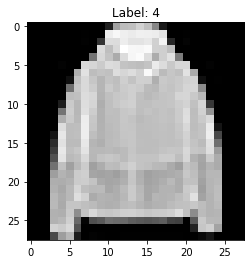

In [6]:
index = random.randrange(10000)
plt.imshow(orig_test[index], cmap= 'gray')
plt.title('Label: %d' % y_test[index])
plt.show()

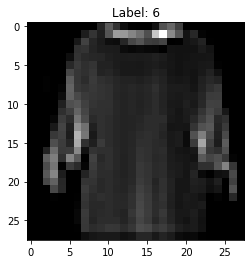

In [7]:
index = random.randrange(60000)
plt.imshow(x_train[index], cmap= 'gray')
plt.title('Label: %d' % y_train[index])
plt.show()

In [8]:
def name(x):
  if x == 0:
    return "T-shirt/Top"
  elif x == 1:
    return "Trouser"
  elif x == 2:
    return "Pullover"
  elif x == 3:
    return "Dress"
  elif x == 4:
    return "Coat"
  elif x == 5:
    return "Sandal"
  elif x == 6:
    return "Shirt"
  elif x == 7:
    return "Sneaker"
  elif x == 8:
    return "Bag"
  else:
    return "Ankle boot"

Hyperparameters

In [29]:
# Input image dimensions
img_rows, img_cols = 28, 28

# The number of training samples per batch. 128 is a reasonable number.
batch_size = 128

# Our data set contains 10 types, so the number of classes is 10
num_classes = 10

# epochs is the number of times the model is trained with the data set, more can be better, up to a point
epochs = 40

# dropout is a common regularization hyperperameter. It helps to avoid overfitting or memorizing the input.
dropout = 0.5

Preparing Data

In [15]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [30]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)              

In [40]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


Epoch 1/40
469/469 [==============================] - 2s 5ms/step - loss: 1.0177 - accuracy: 0.6792 - val_loss: 0.6730 - val_accuracy: 0.7535
Epoch 2/40
469/469 [==============================] - 2s 5ms/step - loss: 0.5968 - accuracy: 0.7814 - val_loss: 0.5831 - val_accuracy: 0.7854
Epoch 3/40
469/469 [==============================] - 2s 4ms/step - loss: 0.5218 - accuracy: 0.8123 - val_loss: 0.5171 - val_accuracy: 0.8132
Epoch 4/40
469/469 [==============================] - 2s 4ms/step - loss: 0.4746 - accuracy: 0.8327 - val_loss: 0.4793 - val_accuracy: 0.8274
Epoch 5/40
469/469 [==============================] - 2s 4ms/step - loss: 0.4421 - accuracy: 0.8435 - val_loss: 0.4508 - val_accuracy: 0.8369
Epoch 6/40
469/469 [==============================] - 2s 5ms/step - loss: 0.4194 - accuracy: 0.8514 - val_loss: 0.4287 - val_accuracy: 0.8484
Epoch 7/40
469/469 [==============================] - 2s 5ms/step - loss: 0.4006 - accuracy: 0.8600 - val_loss: 0.4341 - val_accuracy: 0.8440
Epoch 

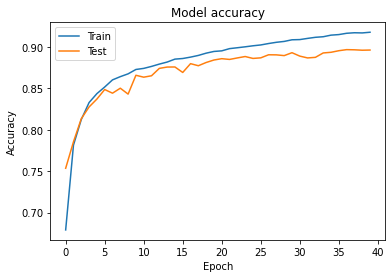

In [41]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model for a given number of epochs
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Evaluate model against test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [42]:
predictions = model.predict(x_test)
most_likely = predictions.argmax(1)

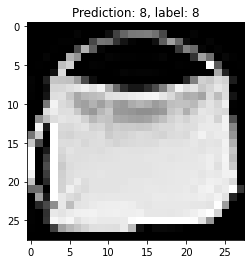

In [43]:
index = random.randrange(10000)
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.imshow(orig_test[index], cmap='gray')
plt.show()

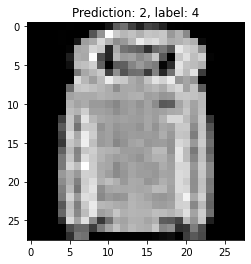

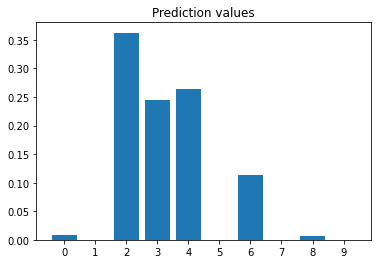

In [44]:
for i in range(10000):
    index = random.randrange(10000)
    if most_likely[index] != y_test[index]:
        break

plt.imshow(orig_test[index], cmap='gray')
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.show()

plt.bar(range(10), predictions[index], tick_label=range(10))
plt.title('Prediction values')
plt.show()